In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
import src.time_indep_algorithm as tia

# Part 1.

In [3]:
# your plots and results here

# Part 2. 

In [4]:
# your plots and results here

# Part 3. The time independent dynamics

## 3.1 Comparison with analytical linear dependence of the concertration on y

All columns are the same. 

Converged after 4067 iterations with converge error 9.994777e-06 

max turncation error: 9.729133e-03 



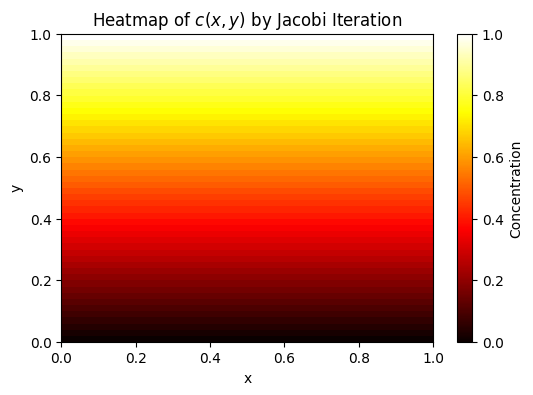

Concentration matrix results: 

clomun 0: [1.         0.97896817 0.9579389  0.93691474 0.91589823 0.89489187
 0.87389811 0.85291936 0.83195797 0.81101621 0.79009626 0.76920025
 0.74833016 0.7274879  0.70667525 0.68589387 0.6651453  0.64443093
 0.62375203 0.60310971 0.58250492 0.56193849 0.54141104 0.52092309
 0.50047495 0.48006679 0.45969861 0.43937024 0.41908136 0.39883147
 0.37861994 0.35844594 0.33830851 0.31820655 0.2981388  0.27810385
 0.25810018 0.23812611 0.21817987 0.19825956 0.17836318 0.15848861
 0.13863367 0.11879609 0.09897352 0.07916355 0.05936373 0.03957156
 0.0197845  0.        ] 

clomun 1: [1.         0.97896817 0.9579389  0.93691474 0.91589823 0.89489187
 0.87389811 0.85291936 0.83195797 0.81101621 0.79009626 0.76920025
 0.74833016 0.7274879  0.70667525 0.68589387 0.6651453  0.64443093
 0.62375203 0.60310971 0.58250492 0.56193849 0.54141104 0.52092309
 0.50047495 0.48006679 0.45969861 0.43937024 0.41908136 0.39883147
 0.37861994 0.35844594 0.33830851 0.31820655 0.2981

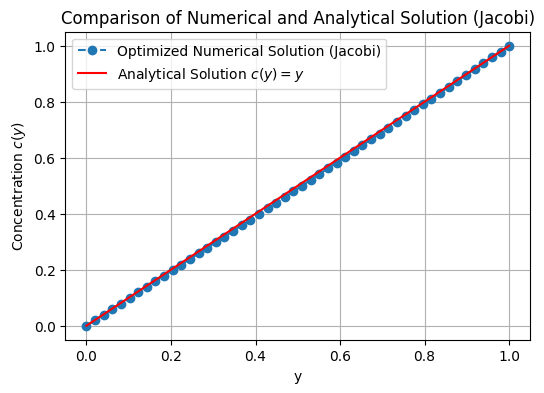

In [6]:
# run the Jacobi iteration
optimized_concentration, iteration, delta, _ = tia.jacobi_parallel()

# check each column is the same symetrically
for i in range(1, optimized_concentration.shape[1]):
    np.allclose(optimized_concentration[:, i], optimized_concentration[:, 0])
print("All columns are the same. \n")
print(f"Converged after {iteration} iterations with converge error {delta:.6e} \n")
# c_y_numerical_optimized = np.mean(optimized_concentration, axis=1)
c_y_numerical_optimized = optimized_concentration[:, 0]
y_values_optimized = np.linspace(1, 0, len(c_y_numerical_optimized))

# calculate the maximum error
max_error_optimized = np.max(np.abs(c_y_numerical_optimized - y_values_optimized))
print(f"max turncation error: {max_error_optimized:.6e} \n")

# plot the heatmap of the optimized concentration
plt.figure(figsize=(6, 4))
plt.imshow(optimized_concentration, cmap="hot", aspect="auto", origin="lower",extent=[0, 1, 1, 0])
plt.colorbar(label="Concentration")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heatmap of $c(x, y)$ by Jacobi Iteration")
plt.gca().invert_yaxis()  # invert y-axis to match the analytical solution
plt.savefig("./fig/heatmap_jacobi.png")
plt.show()

# print the concertration matrix results
print("Concentration matrix results: \n")
print(f"clomun 0: {optimized_concentration[:, 0]} \n")
print(f"clomun 1: {optimized_concentration[:, 1]} \n")
print(f"clomun 2: {optimized_concentration[:, 2]} \n")
print(f"clomun -1: {optimized_concentration[:, -1]} \n")
print(f"clomun -2: {optimized_concentration[:, -2]} \n")
print(f"clomun -3: {optimized_concentration[:, -3]} \n")

# plot the numerical solution
plt.figure(figsize=(6, 4))
plt.plot(y_values_optimized, c_y_numerical_optimized, label="Optimized Numerical Solution (Jacobi)", linestyle="--", marker="o")
plt.plot(y_values_optimized, y_values_optimized, label="Analytical Solution $c(y) = y$", linestyle="-", color="r")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Comparison of Numerical and Analytical Solution (Jacobi)")
plt.grid(True)
plt.savefig("./fig/numerical_vs_analytical_jacobi.png")
plt.show()


x: [0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ] 

state at t=0: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] 

state at t=0.001: [1.00000000e+00 5.20543981e-01 2.41126543e-01 1.03265456e-01
 4.18619122e-02 1.63119316e-02 6.17413026e-03 2.28701368e-03
 8.33575050e-04 3.00160312e-04 1.07103306e-04 3.79554424e-05
 1.33813231e-05 4.69916104e-06 1.64526186e-06 5.74684747e-0

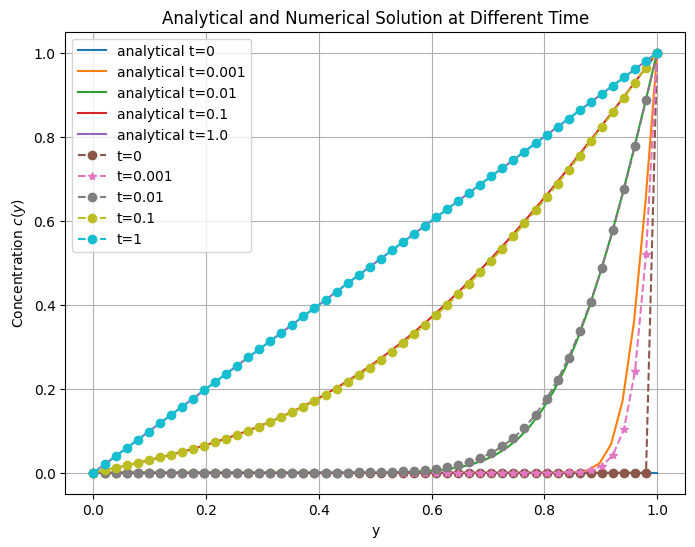

In [11]:
# check the time dependent algorithm
N=52
M=50
D=1.0
dt=0.0001
dx=1/50
max_iterations=15000
epsilon=1e-5

def analytical_solution(x, t, D, max_terms=50):
    """
    Compute the analytical solution for the diffusion equation.
    
    Parameters:
    - x: spatial coordinate (numpy array)
    - t: time (scalar)
    - D: diffusion constant
    - max_terms: number of terms in the summation (truncated at a reasonable value)
    
    Returns:
    - c_x_t: analytical solution at given x and t
    """
    if t == 0:
        return np.zeros_like(x)  # Initial condition assumed to be zero
    
    sum_term = np.zeros_like(x)
    for i in range(max_terms):
        term1 = erfc((1 - x + 2 * i) / (2 * np.sqrt(D * t)))
        term2 = erfc((1 + x + 2 * i) / (2 * np.sqrt(D * t)))
        sum_term += term1 - term2
    
    return sum_term

x = np.linspace(0, 1, 50)  # Define spatial points
print (f"x: {x} \n")
D = 1.0  # Diffusion coefficient
t_values = [0, 0.001, 0.01, 0.1, 1.0]  # Different time points for comparison

optimized_concentration_time_dependent, iteration_time_dependent, delta_time_dependent, _, c_k_list = \
tia.jacobi_parallel_within_time(N, M, D, dt, dx, max_iterations, epsilon)

final_state = c_k_list[-1]
n, m = final_state.shape
final_colums = final_state[:, m//2 - 1]

s0 = c_k_list[0][:, n//2]
s301 = c_k_list[5][:, -1]
s201 = c_k_list[int(0.01/dt)][:, m//2 - 1]
s101 = c_k_list[int(0.1/dt)][:, m//2 -1 ]
s1 = c_k_list[int(1/dt)][:, m//2]

print(f"state at t=0: {s0} \n")
print(f"state at t=0.001: {s301} \n")
print(f"state at t=0.01: {s101} \n")
print(f"state at t=0.1: {s101} \n")
print(f"state at t=1: {s1} \n")
print(f"final state: {final_state} \n")

y_values_optimized = np.linspace(1, 0, len(final_state))

# plot the numerical solution
plt.figure(figsize=(8, 6))
for t in t_values:
    c_analytical = analytical_solution(x, t, D)
    plt.plot(x, c_analytical, label=f"analytical t={t}", linestyle="-")

plt.plot(y_values_optimized, s0, label="t=0", linestyle="--", marker="o")
plt.plot(y_values_optimized, s301, label="t=0.001", linestyle="--", marker="*")
plt.plot(y_values_optimized, s201, label="t=0.01", linestyle="--", marker="o")
plt.plot(y_values_optimized, s101, label="t=0.1", linestyle="--", marker="o")
plt.plot(y_values_optimized, s1, label="t=1", linestyle="--", marker="o")


# plt.plot(y_values_optimized, final_colums, label="Optimized Numerical Solution (Gauss-Seidel)", linestyle="--", marker="o")
# plt.plot(y_values_optimized, y_values_optimized, label="Analytical Solution $c(y) = y$", linestyle="-", color="r")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Analytical and Numerical Solution at Different Time")
plt.grid(True)
plt.show()

Converged after 2360 iterations with converge error 9.994987e-06
max turncation error: 4.858327e-03


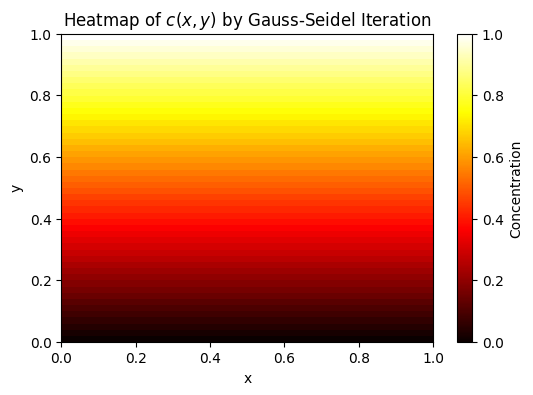

Concentration matrix results: 

clomun 0: [1.         0.97927295 0.95854787 0.93782605 0.91710877 0.8963973
 0.87569286 0.85499666 0.83430986 0.81363359 0.79296893 0.7723169
 0.75167849 0.73105461 0.71044611 0.6898538  0.66927838 0.64872051
 0.62818077 0.60765967 0.58715762 0.56667499 0.54621202 0.52576891
 0.50534575 0.48494258 0.46455933 0.44419584 0.42385191 0.40352723
 0.38322141 0.362934   0.34266446 0.32241218 0.30217649 0.28195666
 0.26175186 0.24156124 0.22138388 0.20121879 0.18106496 0.16092132
 0.14078676 0.12066014 0.10054029 0.080426   0.06031607 0.04020926
 0.02010432 0.        ] 

clomun 1: [1.         0.97927297 0.9585479  0.93782609 0.91710883 0.89639736
 0.87569294 0.85499675 0.83430996 0.8136337  0.79296905 0.77231704
 0.75167863 0.73105476 0.71044627 0.68985396 0.66927855 0.64872069
 0.62818096 0.60765986 0.58715782 0.56667518 0.54621222 0.52576911
 0.50534595 0.48494278 0.46455952 0.44419604 0.42385211 0.40352742
 0.3832216  0.36293418 0.34266463 0.32241235 0.302176

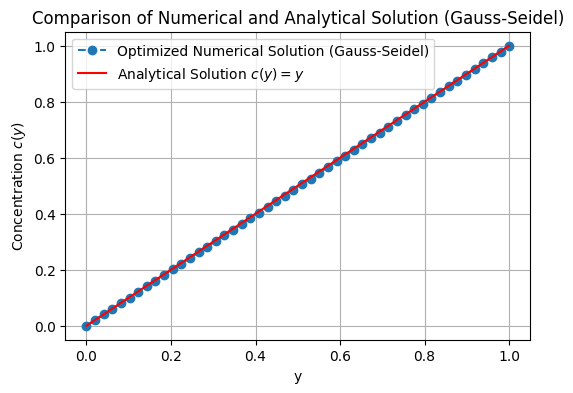

In [7]:
# run the Gauss-Seidel iteration
optimized_concentration, iteration, delta, _ = tia.gauss_seidel_seq()
print(f"Converged after {iteration} iterations with converge error {delta:.6e}")
# c_y_numerical_optimized = np.mean(optimized_concentration, axis=1)
c_y_numerical_optimized = optimized_concentration[:, 0]
y_values_optimized = np.linspace(1, 0, len(c_y_numerical_optimized))

# calculate the maximum error
max_error_optimized = np.max(np.abs(c_y_numerical_optimized - y_values_optimized))
print(f"max turncation error: {max_error_optimized:.6e}")

# plot the heatmap of the optimized concentration
plt.figure(figsize=(6, 4))
plt.imshow(optimized_concentration, cmap="hot", aspect="auto", origin="lower",extent=[0, 1, 1, 0])
plt.colorbar(label="Concentration")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heatmap of $c(x, y)$ by Gauss-Seidel Iteration")
plt.gca().invert_yaxis()  # invert y-axis to match the analytical solution
plt.savefig("./fig/heatmap_gauss_seidel.png")
plt.show()

print("Concentration matrix results: \n")
print(f"clomun 0: {optimized_concentration[:, 0]} \n")
print(f"clomun 1: {optimized_concentration[:, 1]} \n")
print(f"clomun 2: {optimized_concentration[:, 2]} \n")
print(f"clomun -1: {optimized_concentration[:, -1]} \n")
print(f"clomun -2: {optimized_concentration[:, -2]} \n")
print(f"clomun -3: {optimized_concentration[:, -3]} \n")

# plot the numerical solution
plt.figure(figsize=(6, 4))
plt.plot(y_values_optimized, c_y_numerical_optimized, label="Optimized Numerical Solution (Gauss-Seidel)", linestyle="--", marker="o")
plt.plot(y_values_optimized, y_values_optimized, label="Analytical Solution $c(y) = y$", linestyle="-", color="r")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Comparison of Numerical and Analytical Solution (Gauss-Seidel)")
plt.grid(True)
plt.savefig("./fig/numerical_vs_analytical_gauss_seidel.png")
plt.show()


Converged after 459 iterations with converge error 9.885075e-06
max turncation error: 6.729286e-04


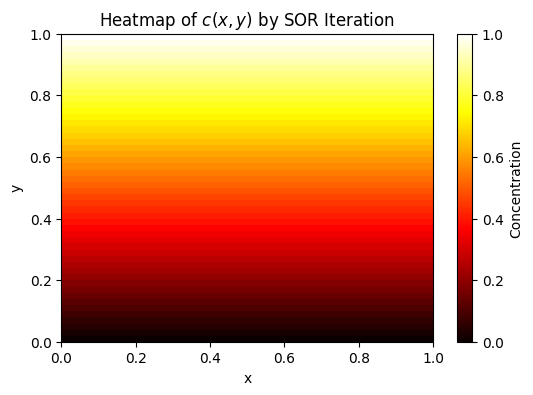

Concentration matrix results: 

clomun 0: [1.         0.97954099 0.95908292 0.93862599 0.91817038 0.89771628
 0.87726384 0.85681323 0.8363646  0.81591808 0.79547381 0.7750319
 0.75459245 0.73415556 0.71372131 0.69328977 0.67286099 0.65243503
 0.63201192 0.61159167 0.59117429 0.57075979 0.55034814 0.52993932
 0.50953329 0.48913    0.46872939 0.44833139 0.42793592 0.4075429
 0.38715222 0.36676378 0.34637746 0.32599314 0.3056107  0.28523001
 0.26485091 0.24447328 0.22409696 0.2037218  0.18334765 0.16297436
 0.14260176 0.1222297  0.10185803 0.08148658 0.06111521 0.04074375
 0.02037207 0.        ] 

clomun 1: [1.         0.979541   0.95908295 0.93862603 0.91817044 0.89771635
 0.87726392 0.85681333 0.83636471 0.8159182  0.79547394 0.77503204
 0.7545926  0.73415571 0.71372147 0.69328994 0.67286117 0.65243522
 0.6320121  0.61159186 0.59117448 0.57075998 0.55034833 0.52993951
 0.50953348 0.48913019 0.46872958 0.44833158 0.42793611 0.40754308
 0.38715239 0.36676395 0.34637762 0.3259933  0.305610

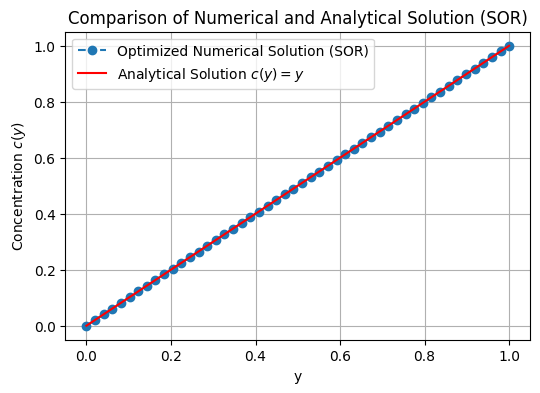

In [9]:
# run sor parallel iteration
optimized_concentration, iteration, delta, _ = tia.sor_seq(omega=1.75)
print(f"Converged after {iteration} iterations with converge error {delta:.6e}")
# c_y_numerical_optimized = np.mean(optimized_concentration, axis=1)
c_y_numerical_optimized = optimized_concentration[:, 0]
y_values_optimized = np.linspace(1, 0, len(c_y_numerical_optimized))

# calculate the maximum error
max_error_optimized = np.max(np.abs(c_y_numerical_optimized - y_values_optimized))
print(f"max turncation error: {max_error_optimized:.6e}")

# plot the heatmap of the optimized concentration
plt.figure(figsize=(6, 4))
plt.imshow(optimized_concentration, cmap="hot", aspect="auto", origin="lower",extent=[0, 1, 1, 0])
plt.colorbar(label="Concentration")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heatmap of $c(x, y)$ by SOR Iteration")
plt.gca().invert_yaxis()  # invert y-axis to match the analytical solution
plt.savefig("./fig/heatmap_sor.png")
plt.show()

print("Concentration matrix results: \n")
print(f"clomun 0: {optimized_concentration[:, 0]} \n")
print(f"clomun 1: {optimized_concentration[:, 1]} \n")
print(f"clomun 2: {optimized_concentration[:, 2]} \n")
print(f"clomun -1: {optimized_concentration[:, -1]} \n")
print(f"clomun -2: {optimized_concentration[:, -2]} \n")
print(f"clomun -3: {optimized_concentration[:, -3]} \n")

# plot the numerical solution
plt.figure(figsize=(6, 4))
plt.plot(y_values_optimized, c_y_numerical_optimized, label="Optimized Numerical Solution (SOR)", linestyle="--", marker="o")
plt.plot(y_values_optimized, y_values_optimized, label="Analytical Solution $c(y) = y$", linestyle="-", color="r")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Comparison of Numerical and Analytical Solution (SOR)")
plt.grid(True)
plt.savefig("./fig/numerical_vs_analytical_sor.png")
plt.show()


## 3.2 Dependence of convergence delta on the number of iterations

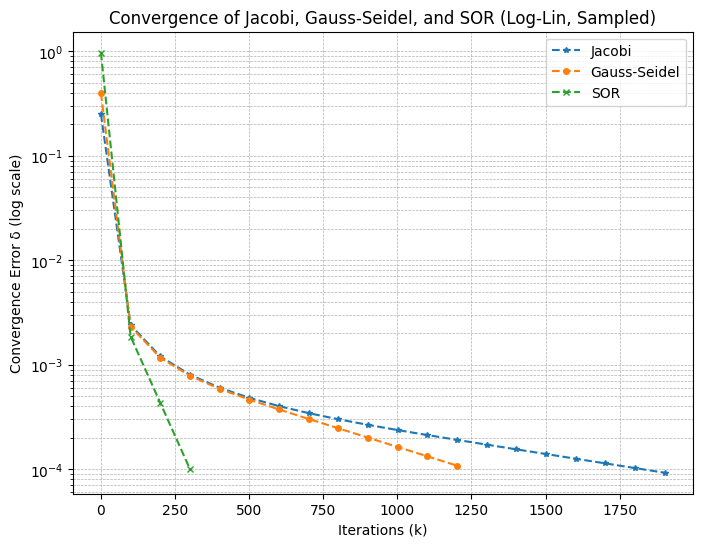

In [18]:
# plot the convergence of the Jacobi, Gauss-Seidel and SOR methods
optimized_concentration_jacbi, iteration_jacbi, delta_jacbi, delta_list_jacbi = tia.jacobi_parallel(max_iterations = 3000)
optimized_concentration_gs, iteration_gs, delta_gs, delta_list_gs = tia.gauss_seidel_seq(max_iterations = 3000)
optimized_concentration_sor, iteration_sor, delta_sor, delta_list_sor = tia.sor_seq(omega=1.75, max_iterations = 3000)

def get_threshold_index(delta_list, threshold):
    return np.argmax(delta_list < threshold) if np.any(delta_list < threshold) else len(delta_list)

error_threshold = 9 * 1e-5
idx_jacobi = get_threshold_index(np.array(delta_list_jacbi), error_threshold)
idx_gs = get_threshold_index(np.array(delta_list_gs), error_threshold)
idx_sor = get_threshold_index(np.array(delta_list_sor), error_threshold)

step = 100  # sample step
log_step_jacobi = np.unique(np.logspace(0, np.log10(idx_jacobi+1), num=100).astype(int))
log_step_gs = np.unique(np.logspace(0, np.log10(idx_gs+1), num=100).astype(int))
log_step_sor = np.unique(np.logspace(0, np.log10(idx_sor+1), num=100).astype(int))

# Sample the data for plotting
iterations_jacobi = np.arange(1, idx_jacobi + 1)[::step]
delta_sample_jacobi = delta_list_jacbi[:idx_jacobi][::step]

iterations_gs = np.arange(1, idx_gs + 1)[::step]
delta_sample_gs = delta_list_gs[:idx_gs][::step]

iterations_sor = np.arange(1, idx_sor + 1)[::step]
delta_sample_sor = delta_list_sor[:idx_sor][::step]

# Plot the convergence of Jacobi, Gauss-Seidel, and SOR methods
plt.figure(figsize=(8, 6))
plt.semilogy(iterations_jacobi, delta_sample_jacobi, label="Jacobi", linestyle="--", marker="*", markersize=4)
plt.semilogy(iterations_gs, delta_sample_gs, label="Gauss-Seidel", linestyle="--", marker="o", markersize=4)
plt.semilogy(iterations_sor, delta_sample_sor, label="SOR", linestyle="--", marker="x", markersize=4)

plt.xlabel("Iterations (k)")
plt.ylabel("Convergence Error δ (log scale)")
plt.legend()
plt.title("Convergence of Jacobi, Gauss-Seidel, and SOR (Log-Lin, Sampled)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig("./fig/convergence_on_iterations.png")
plt.show()



## 3.3 Dependence of optimal Omega on N

Successive Over-Relaxation (SOR) method improves the convergence of Gauss-Seidel iteration by introducing a relaxation factor $ \omega $. The optimal choice of $ \omega $ depends on the grid size $ N $. According to empirical formulas:

$$
\omega_{opt} \approx \frac{2}{1 + \sin(\frac{\pi}{N})}
$$
As $( N \to \infty )$, $ \omega_{opt} \to 2 $



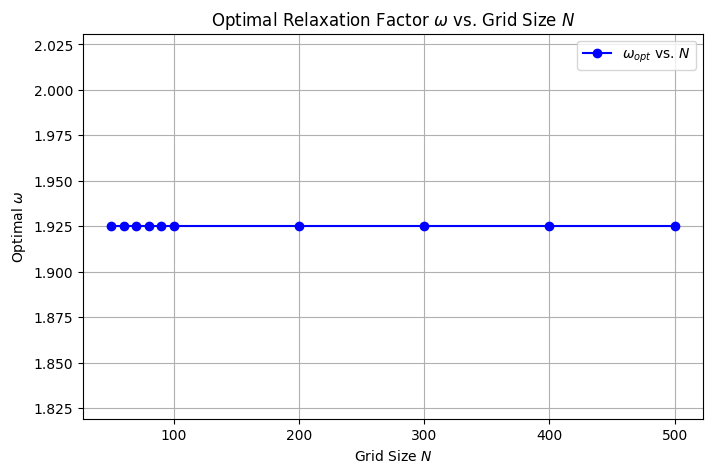

In [ ]:
# Function to run SOR with different omega values
def run_sor_experiment(N_values, omega_values, tia):
    results = []
    
    for N in N_values:
        best_iterations = float('inf')
        best_omega = None
        
        for omega in omega_values:
            _, iteration_sor, delta_sor, _ = tia.sor_seq(N=N, M=N, omega=omega, max_iterations=10000)
            
            if iteration_sor < best_iterations:
                best_iterations = iteration_sor
                best_omega = omega
        
        results.append((N, best_omega, best_iterations))
    
    return np.array(results)

# Define grid sizes and omega values to test
N_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]
omega_values = np.linspace(1.7, 2.0, 5)  # Search omega in [1.7, 2.0]

# Run the experiment
results = run_sor_experiment(N_values, omega_values, tia)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(results[:, 0], results[:, 1], marker='o', linestyle='-', color='b', label="$\\omega_{opt}$ vs. $N$")
plt.xlabel("Grid Size $N$")
plt.ylabel("Optimal $\\omega$")
plt.title("Optimal Relaxation Factor $\\omega$ vs. Grid Size $N$")
plt.legend()
plt.grid()
plt.savefig("./fig/optimal_omega_vs_N.png")
plt.show()


## 3.4 Sinks in the domain

Converged after 226 iterations with converge error 9.751354e-06
max turncation error: 3.577197e-01


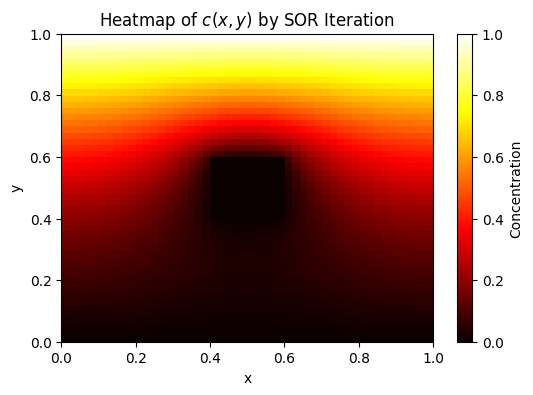

In [3]:
# show how the sink affects the convergence
optimized_concentration, iteration, delta, _ = tia.sor_with_rect_sinks(omega=1.75, sink_list=[(20, 20, 10, 10)])
print(f"Converged after {iteration} iterations with converge error {delta:.6e}")
c_y_numerical_optimized = np.mean(optimized_concentration, axis=1)
y_values_optimized = np.linspace(1, 0, len(c_y_numerical_optimized))

# calculate the maximum error
max_error_optimized = np.max(np.abs(c_y_numerical_optimized - y_values_optimized))
print(f"max turncation error: {max_error_optimized:.6e}")

# plot the heatmap of the optimized concentration
plt.figure(figsize=(6, 4))
plt.imshow(optimized_concentration, cmap="hot", aspect="auto", origin="lower",extent=[0, 1, 1, 0])
plt.colorbar(label="Concentration")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heatmap of $c(x, y)$ by SOR Iteration")
plt.gca().invert_yaxis()  # invert y-axis to match the analytical solution
plt.savefig("./fig/heatmap_sor_with_sink.png")
plt.show()